In [1]:
import numpy as np
import keras
import cv2
from matplotlib import pyplot as plt


In [2]:
model = keras.models.load_model('./stone_seg_resnet18_encoderNone.keras', compile=False)

In [3]:
testimg = cv2.imread('./test/ImageTest.JPG')
testimg = cv2.cvtColor(testimg , cv2.COLOR_BGR2RGB)
testimg = cv2.resize(testimg , (256,256))
testimg = testimg.astype(np.float32)/255.0
print(testimg.shape)
testimg = np.expand_dims(testimg , axis=0)
print(testimg.shape)

(256, 256, 3)
(1, 256, 256, 3)


In [4]:
prediction = model.predict(testimg)
print(prediction.shape)
prediction = np.squeeze(prediction , axis=0)
print(prediction.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
(1, 256, 256, 1)
(256, 256, 1)


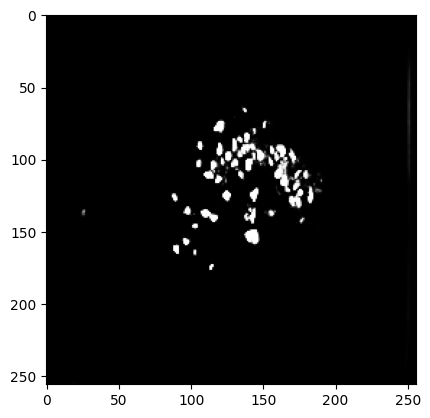

In [7]:
plt.imshow(prediction, cmap='gray')
plt.show()

In [8]:
testimg_label = cv2.imread('./test/ImageTest_label.jpg')
testimg_label = cv2.cvtColor(testimg_label , cv2.COLOR_BGR2GRAY)
testimg_label = cv2.resize(testimg_label , (256,256))
testimg_label = testimg_label.astype(np.float32)/255.0
testimg_label = np.expand_dims(testimg_label, axis=2)
print(testimg_label.shape)

(256, 256, 1)


In [10]:
prediction= prediction.flatten()
testimg_label =testimg_label.flatten()

intersection = np.sum( np.logical_and(prediction , testimg_label))
union = np.sum( np.logical_or ( prediction , testimg_label))

iou_score = intersection / union
print(iou_score)



0.0223846435546875
